In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os, csv
import numpy as np
import statsmodels.api as sm

In [27]:
literacy_df = pd.read_csv("../Data/Literacy2.csv", encoding = "ISO-8859-1")
happiness_df = pd.read_csv ("../Data/2017.csv")

In [28]:
combined_literacy_df = pd.merge(happiness_df, literacy_df, how='outer', on='Country')
combined_literacy_df

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Rank,Literacy Rate (Rounded)
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,6.0,1.00
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,37.0,0.99
2,Iceland,3.0,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,40.0,0.99
3,Switzerland,4.0,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,47.0,0.99
4,Finland,5.0,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2.0,1.00
5,Netherlands,6.0,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,44.0,0.99
6,Canada,7.0,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,35.0,0.99
7,New Zealand,8.0,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,45.0,0.99
8,Sweden,9.0,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,46.0,0.99
9,Australia,10.0,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,33.0,0.99


In [29]:
new_literacy_df = combined_literacy_df.dropna(how='any')

In [30]:
new_literacy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 154
Data columns (total 14 columns):
Country                          137 non-null object
Happiness.Rank                   137 non-null float64
Happiness.Score                  137 non-null float64
Whisker.high                     137 non-null float64
Whisker.low                      137 non-null float64
Economy..GDP.per.Capita.         137 non-null float64
Family                           137 non-null float64
Health..Life.Expectancy.         137 non-null float64
Freedom                          137 non-null float64
Generosity                       137 non-null float64
Trust..Government.Corruption.    137 non-null float64
Dystopia.Residual                137 non-null float64
Rank                             137 non-null float64
Literacy Rate (Rounded)          137 non-null float64
dtypes: float64(13), object(1)
memory usage: 16.1+ KB


In [31]:
list(new_literacy_df.columns.values)

['Country',
 'Happiness.Rank',
 'Happiness.Score',
 'Whisker.high',
 'Whisker.low',
 'Economy..GDP.per.Capita.',
 'Family',
 'Health..Life.Expectancy.',
 'Freedom',
 'Generosity',
 'Trust..Government.Corruption.',
 'Dystopia.Residual',
 'Rank',
 'Literacy Rate (Rounded)']

In [32]:
new_literacy_df = new_literacy_df[['Country',
 'Happiness.Rank',
 'Happiness.Score',
 'Literacy Rate (Rounded)',
 'Whisker.high',
 'Whisker.low',
 'Economy..GDP.per.Capita.',
 'Family',
 'Health..Life.Expectancy.',
 'Freedom',
 'Generosity',
 'Trust..Government.Corruption.',
 'Dystopia.Residual',
 'Rank']]
new_literacy_df.head()

,Country,Happiness.Rank,Happiness.Score,Literacy Rate (Rounded),Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Rank
0,Norway,1.0,7.537,1.00,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,6.0
1,Denmark,2.0,7.522,0.99,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,37.0
2,Iceland,3.0,7.504,0.99,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,40.0
3,Switzerland,4.0,7.494,0.99,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,47.0
4,Finland,5.0,7.469,1.00,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2.0


In [33]:
new_literacy_df['Literacy Rate (Rounded)'] = new_literacy_df['Literacy Rate (Rounded)'] * 100
new_literacy_df.head()

,Country,Happiness.Rank,Happiness.Score,Literacy Rate (Rounded),Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Rank
0,Norway,1.0,7.537,100.0,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,6.0
1,Denmark,2.0,7.522,99.0,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,37.0
2,Iceland,3.0,7.504,99.0,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,40.0
3,Switzerland,4.0,7.494,99.0,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,47.0
4,Finland,5.0,7.469,100.0,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2.0


In [34]:
new_literacy_df.to_csv("../Data/New_Literacy.csv", encoding="utf-8", index=False)

In [35]:
final_literacy_df = pd.read_csv("../Data/New_Literacy.csv")

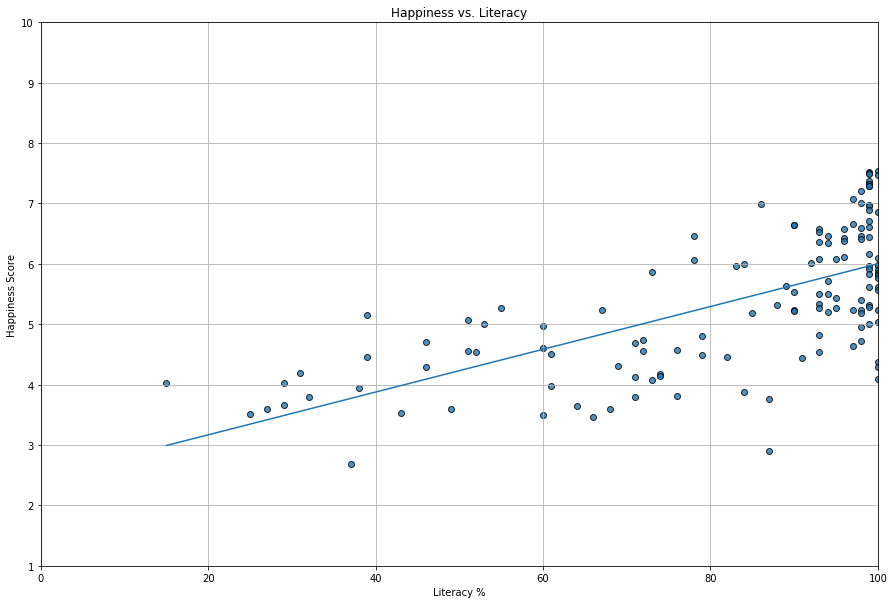

In [36]:
#Scatterplot Visualisation
plt.figure(figsize=(15,10))
plt.title("Happiness vs. Literacy")
plt.xlabel("Literacy %")
plt.ylabel("Happiness Score")
plt.grid(True)


plt.scatter(final_literacy_df["Literacy Rate (Rounded)"],
           final_literacy_df["Happiness.Score"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8)

plt.xlim(0, 100)
plt.ylim(1,10)

plt.plot(np.unique(final_literacy_df["Literacy Rate (Rounded)"]),
         np.poly1d(np.polyfit(final_literacy_df["Literacy Rate (Rounded)"], final_literacy_df["Happiness.Score"], 1))
         (np.unique(final_literacy_df["Literacy Rate (Rounded)"])))

plt.savefig("Happy_vs_Literacy.png")

In [37]:
#P-Value
X = final_literacy_df["Literacy Rate (Rounded)"]
Y = X + final_literacy_df["Happiness.Score"]

final_literacy_reg = sm.OLS(Y,sm.add_constant(X)).fit()

print(final_literacy_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 8.711e+04
Date:                Sat, 15 Sep 2018   Prob (F-statistic):          1.36e-191
Time:                        13:47:08   Log-Likelihood:                -175.45
No. Observations:                 137   AIC:                             354.9
Df Residuals:                     135   BIC:                             360.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     